In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [51]:
df=pd.read_csv('expected_ctc.csv')

In [52]:
df.describe()

,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
count,25000.000000,25000.000000,25000.000000,25000.000000,18820.000000,17308.000000,13119.000000,2.500000e+04,25000.000000,25000.000000,25000.000000,25000.000000,2.500000e+04
mean,12500.500000,34993.240080,12.493080,6.258200,2002.193624,2005.153571,2007.396372,1.760945e+06,3.482040,4.089040,0.773680,0.081720,2.250155e+06
std,7217.022701,14390.271591,7.471398,5.819513,8.316640,9.022963,7.493601,9.202125e+05,1.690335,2.606612,1.199449,0.273943,1.160480e+06
min,1.000000,10000.000000,0.000000,0.000000,1986.000000,1988.000000,1995.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,2.037440e+05
25%,6250.750000,22563.750000,6.000000,1.000000,1996.000000,1997.000000,2001.000000,1.027312e+06,2.000000,2.000000,0.000000,0.000000,1.306278e+06
50%,12500.500000,34974.500000,12.000000,5.000000,2002.000000,2006.000000,2007.000000,1.802568e+06,3.000000,4.000000,0.000000,0.000000,2.252136e+06
75%,18750.250000,47419.000000,19.000000,10.000000,2009.000000,2012.000000,2014.000000,2.443883e+06,5.000000,6.000000,1.000000,0.000000,3.051354e+06
max,25000.000000,60000.000000,25.000000,25.000000,2020.000000,2023.000000,2020.000000,3.999693e+06,6.000000,8.000000,5.000000,1.000000,5.599570e+06


In [53]:
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 29 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   IDX                                25000 non-null  int64  
 1   Applicant_ID                       25000 non-null  int64  
 2   Total_Experience                   25000 non-null  int64  
 3   Total_Experience_in_field_applied  25000 non-null  int64  
 4   Department                         22222 non-null  object 
 5   Role                               24037 non-null  object 
 6   Industry                           24092 non-null  object 
 7   Organization                       24092 non-null  object 
 8   Designation                        21871 non-null  object 
 9   Education                          25000 non-null  object 
 10  Graduation_Specialization          18820 non-null  object 
 11  University_Grad                    18820 non-null  obj

(25000, 29)

In [54]:
missing_values = df.isnull().sum()
print(missing_values)

IDX                                      0
Applicant_ID                             0
Total_Experience                         0
Total_Experience_in_field_applied        0
Department                            2778
Role                                   963
Industry                               908
Organization                           908
Designation                           3129
Education                                0
Graduation_Specialization             6180
University_Grad                       6180
Passing_Year_Of_Graduation            6180
PG_Specialization                     7692
University_PG                         7692
Passing_Year_Of_PG                    7692
PHD_Specialization                   11881
University_PHD                       11881
Passing_Year_Of_PHD                  11881
Curent_Location                          0
Preferred_location                       0
Current_CTC                              0
Inhand_Offer                             0
Last_Apprai

In [55]:
for col in ['Department', 'Role', 'Industry', 'Organization', 'Designation', 'Graduation_Specialization', 'University_Grad', 'PG_Specialization', 'University_PG', 'PHD_Specialization', 'University_PHD', 'Last_Appraisal_Rating']:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].mode()[0], inplace=True)

for col in ['Passing_Year_Of_Graduation', 'Passing_Year_Of_PG', 'Passing_Year_Of_PHD']:
    if col in df.columns and df[col].isnull().sum() > 0:
        df[col].fillna(df[col].median(), inplace=True)

missing_values_after = df.isnull().sum()
print("\nMissing values per column after handling:")
print(missing_values_after)


Missing values per column after handling:
IDX                                  0
Applicant_ID                         0
Total_Experience                     0
Total_Experience_in_field_applied    0
Department                           0
Role                                 0
Industry                             0
Organization                         0
Designation                          0
Education                            0
Graduation_Specialization            0
University_Grad                      0
Passing_Year_Of_Graduation           0
PG_Specialization                    0
University_PG                        0
Passing_Year_Of_PG                   0
PHD_Specialization                   0
University_PHD                       0
Passing_Year_Of_PHD                  0
Curent_Location                      0
Preferred_location                   0
Current_CTC                          0
Inhand_Offer                         0
Last_Appraisal_Rating                0
No_Of_Companies_worke

/tmp/ipython-input-3221661223.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-3221661223.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

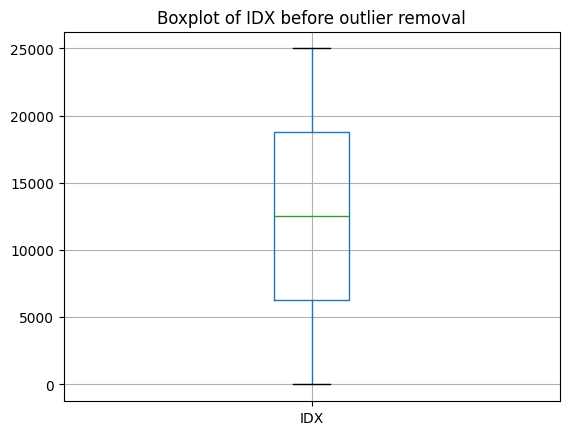

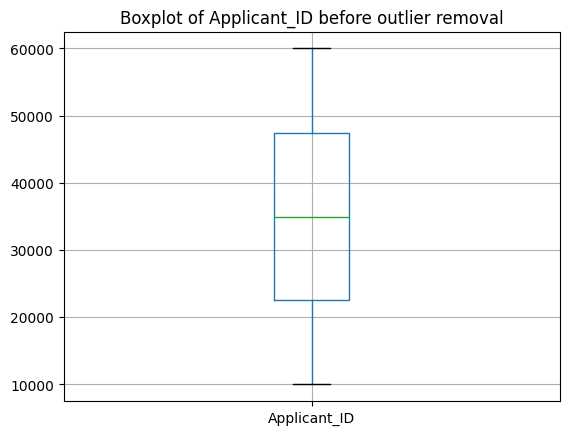

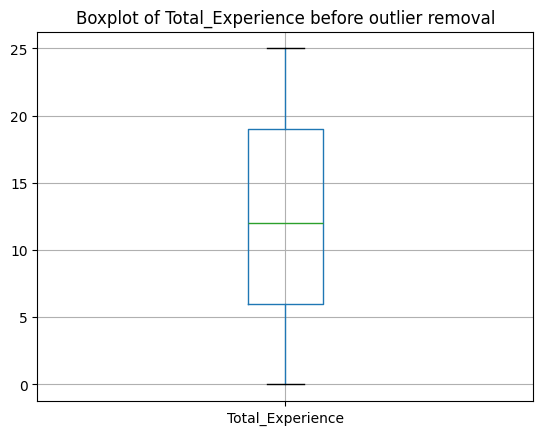

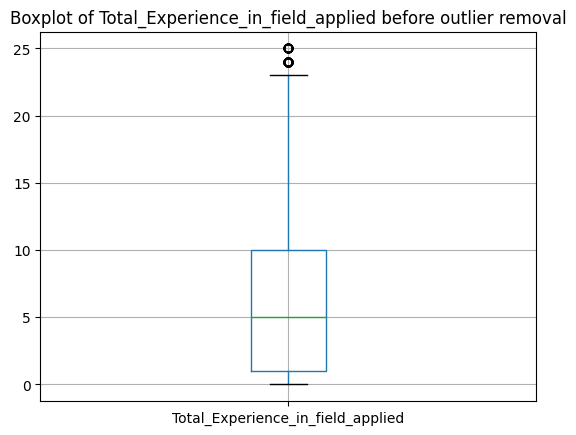

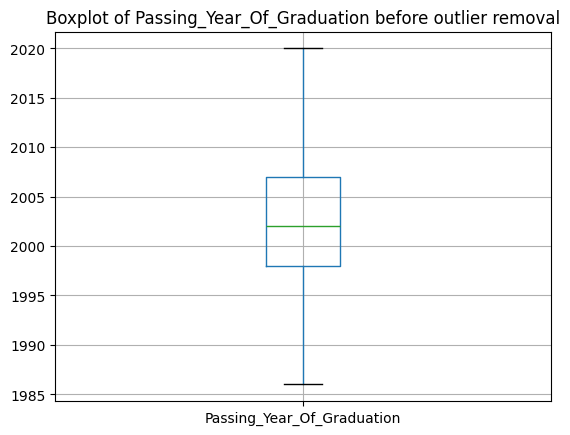

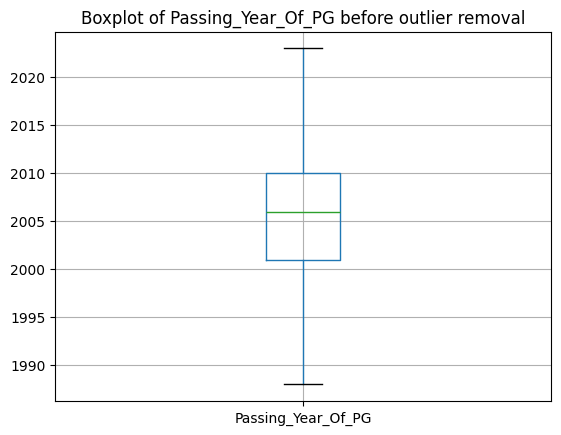

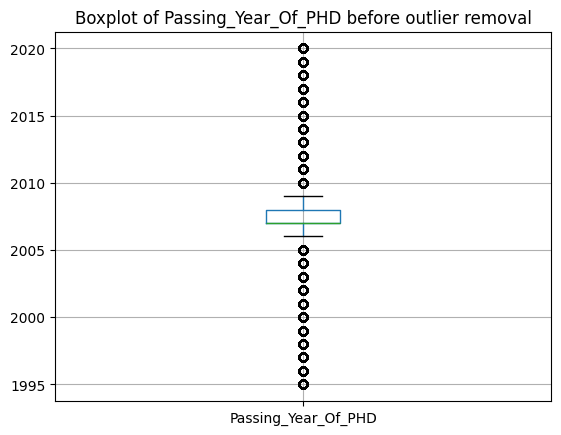

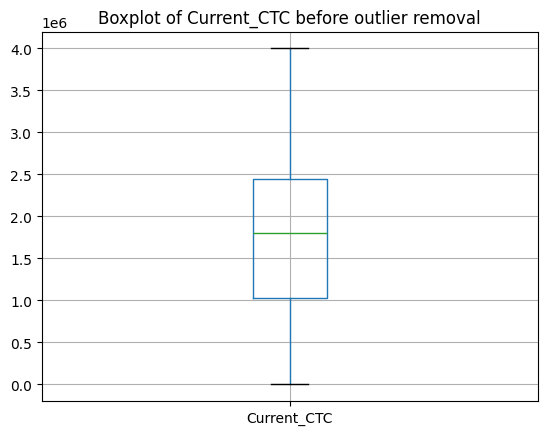

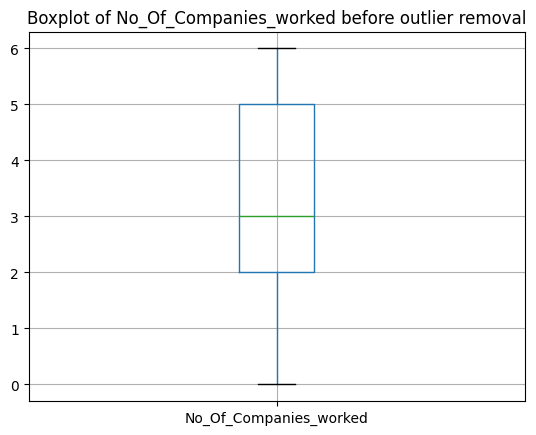

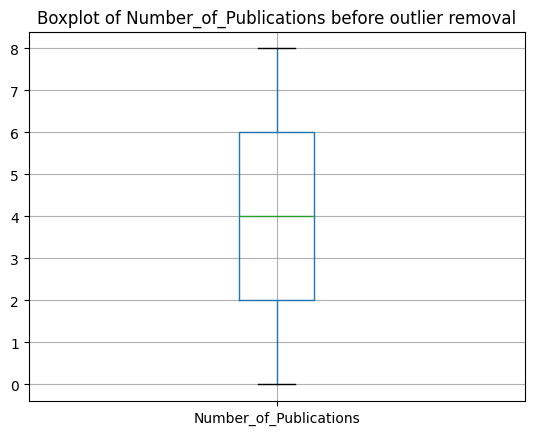

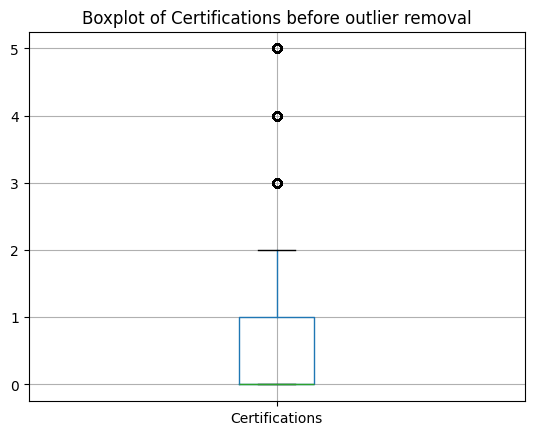

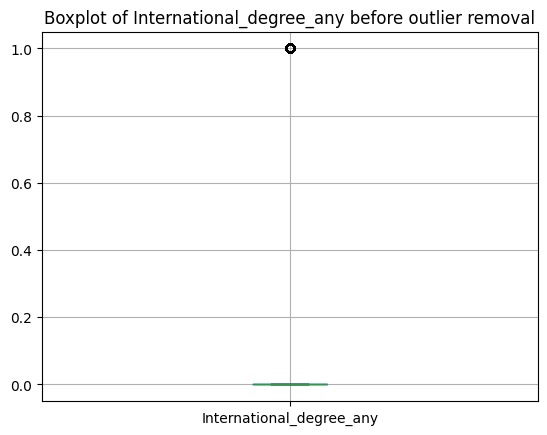

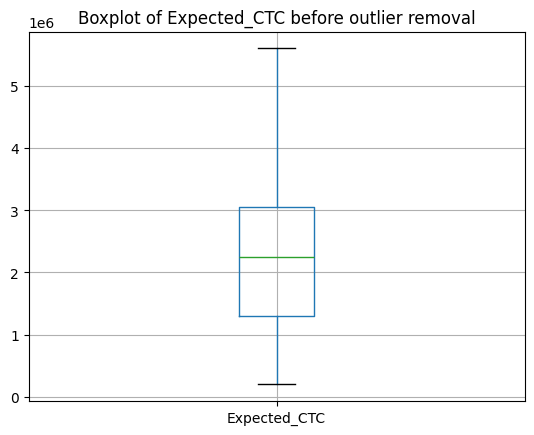

In [56]:
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col} before outlier removal')
    plt.show()

In [57]:
def remove_outliers(df, column):

    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove outliers
    df_cleaned = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)].copy()

    return df_cleaned

In [58]:
# Apply the remove_outliers function to numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    df = remove_outliers(df, col)

print("Outliers removed from numerical columns.")

Outliers removed from numerical columns.


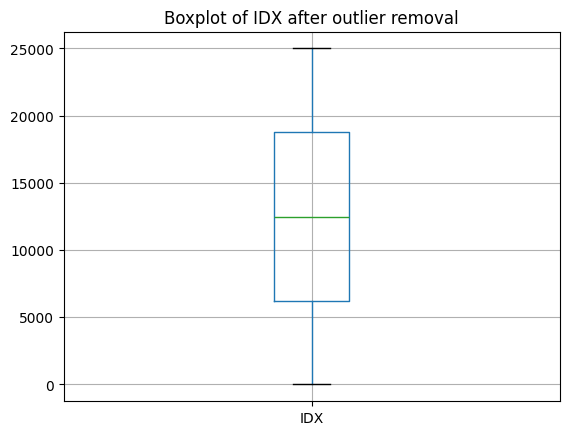

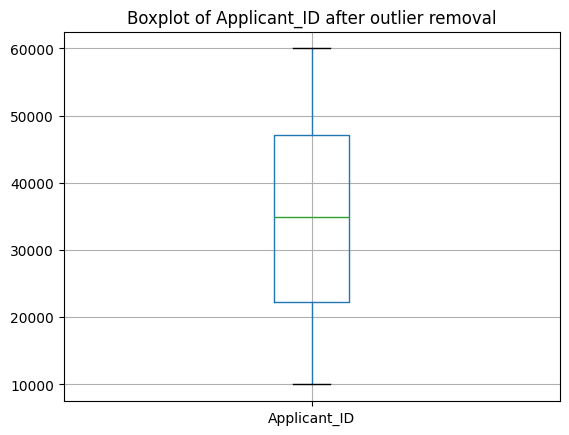

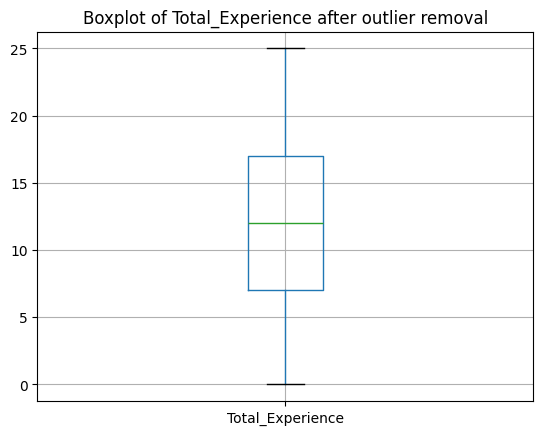

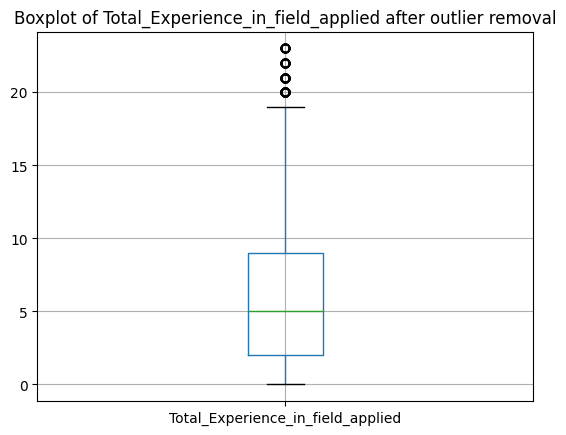

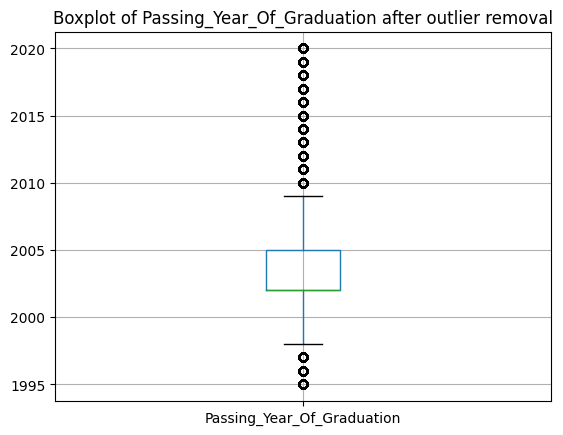

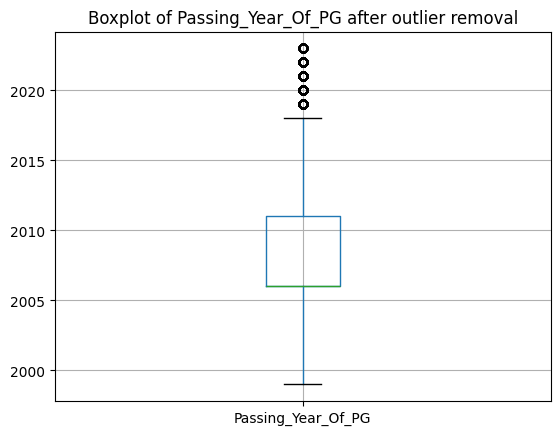

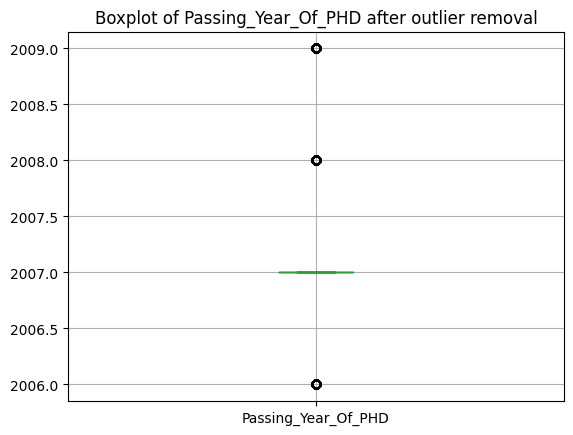

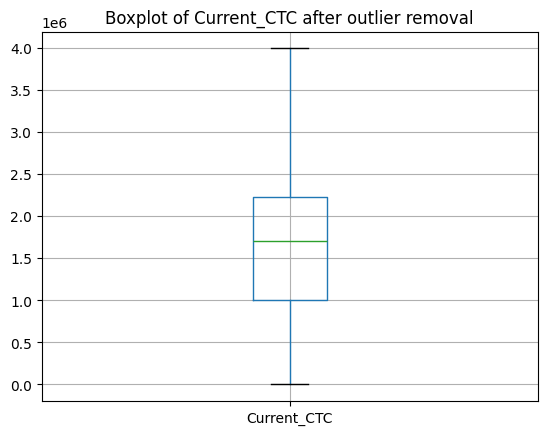

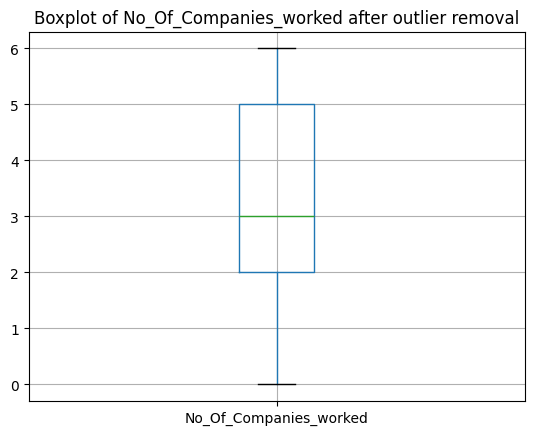

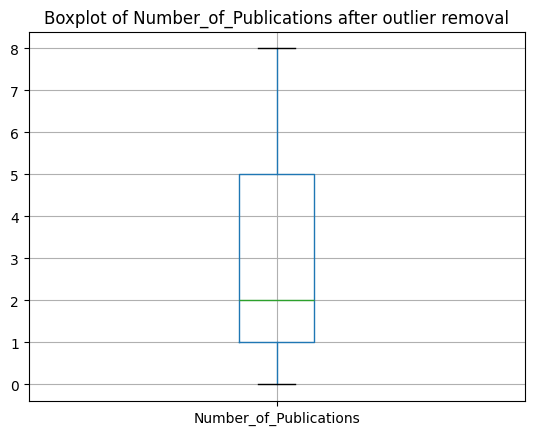

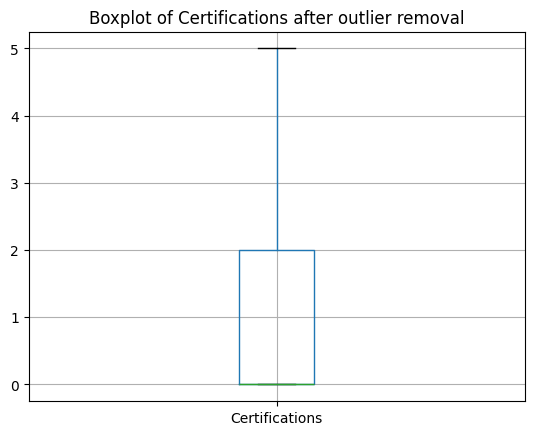

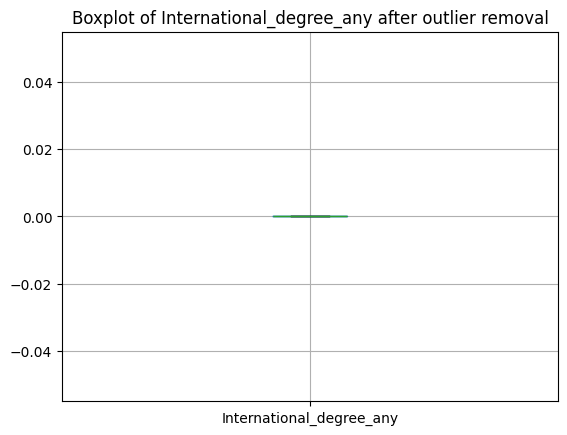

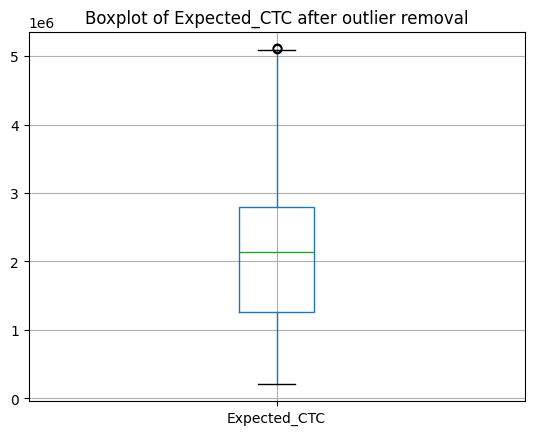

In [59]:
# Display boxplots for numerical columns after outlier removal
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

for col in numerical_cols:
    df.boxplot(column=col)
    plt.title(f'Boxplot of {col} after outlier removal')
    plt.show()

In [60]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler

StandardScaler()

In [61]:
from sklearn.preprocessing import StandardScaler

# Identify numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()

# Initialize StandardScaler
scaler = StandardScaler()

# Apply StandardScaler to numerical columns
df[numerical_cols] = scaler.fit_transform(df[numerical_cols])

print("Numerical columns scaled using StandardScaler.")

Numerical columns scaled using StandardScaler.


Value counts for 'Department':
Department
Marketing         2736
Healthcare        1050
Others            1046
Education         1024
Banking           1016
HR                1016
Analytics/BI      1003
Sales              972
Engineering        971
Top Management     842
Accounts           475
IT-Software        448
Name: count, dtype: int64


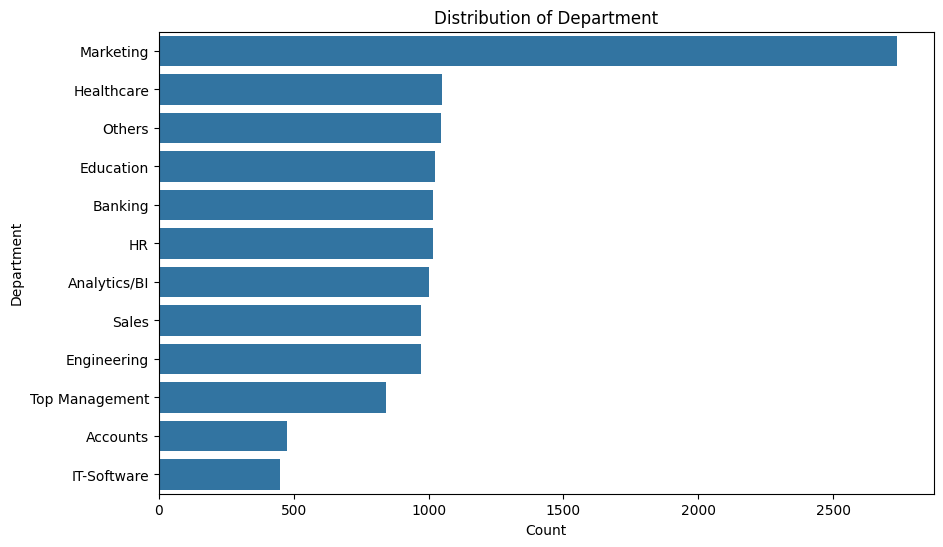

------------------------------
Value counts for 'Role':
Role
Others                  1724
Analyst                 1057
Bio statistician        1050
Consultant              1018
Team Lead                996
Project Manager          992
Business Analyst         965
Sales Execituve          875
Senior Researcher        819
Sales Manager            770
Financial Analyst        567
Associate                359
CEO                      331
Head                     314
Scientist                264
Data scientist           100
Researcher                90
Area Sales Manager        83
Senior Analyst            65
Sr. Business Analyst      63
Principal Analyst         55
Professor                 22
Research Scientist        12
Lab Executuve              8
Name: count, dtype: int64


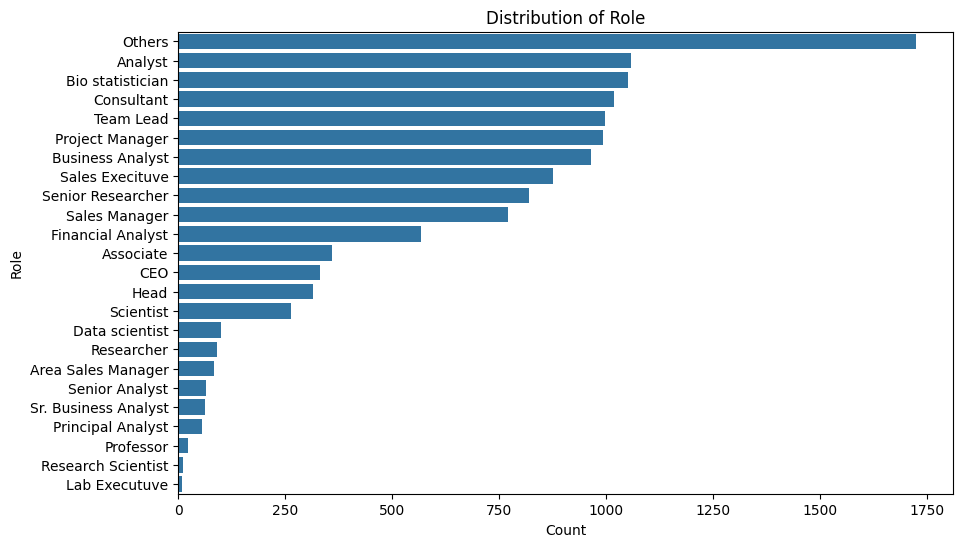

------------------------------
Value counts for 'Industry':
Industry
Training      1573
Insurance     1147
Retail        1136
Telecom       1112
Analytics     1108
Aviation      1108
IT            1095
FMCG          1095
Automobile    1092
BFSI          1081
Others        1052
Name: count, dtype: int64


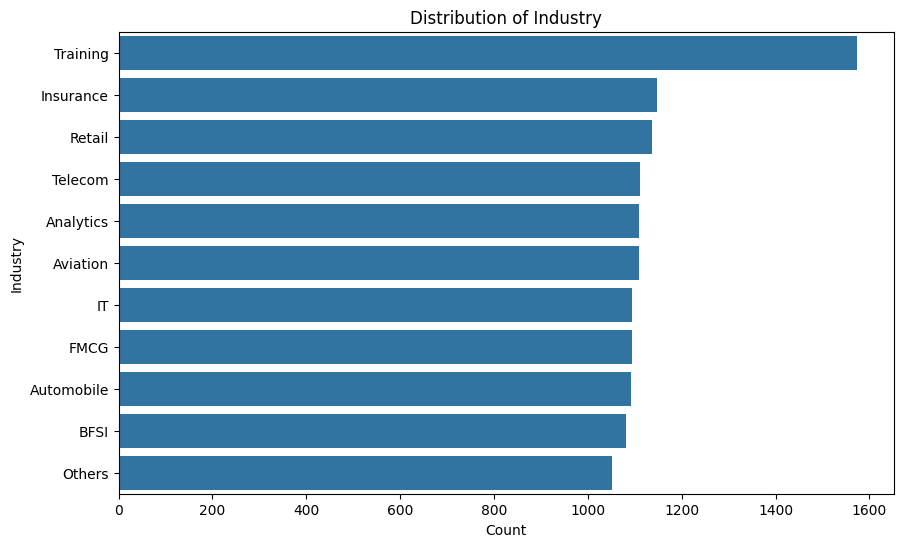

------------------------------
Value counts for 'Organization':
Organization
M    1273
H     786
I     784
J     780
P     779
O     760
F     758
A     756
K     754
D     754
E     744
G     742
L     737
B     735
N     731
C     726
Name: count, dtype: int64


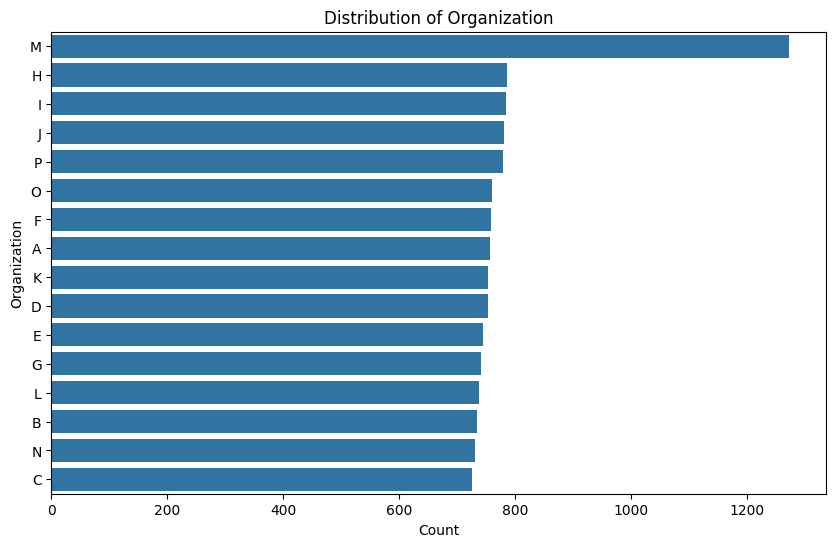

------------------------------
Value counts for 'Designation':
Designation
HR                    2634
Others                 846
Manager                844
Sr.Manager             826
Product Manager        822
Marketing Manager      814
Consultant             813
Data Analyst           812
Assistant Manager      792
Research Analyst       784
Medical Officer        602
Software Developer     383
Web Designer           359
Network Engineer       338
Research Scientist     328
Director               297
CA                     287
Scientist               18
Name: count, dtype: int64


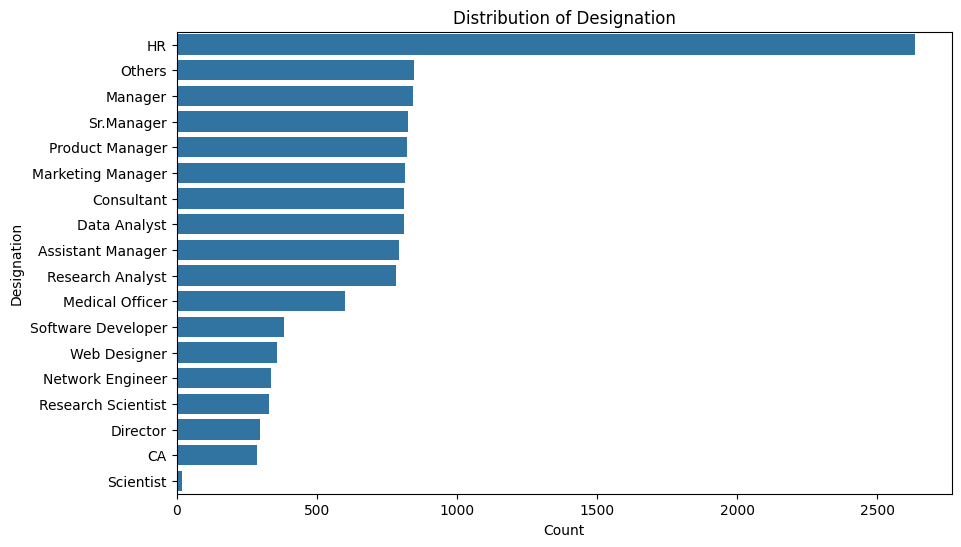

------------------------------
Value counts for 'Education':
Education
Under Grad    5655
PG            2342
Doctorate     2314
Grad          2288
Name: count, dtype: int64


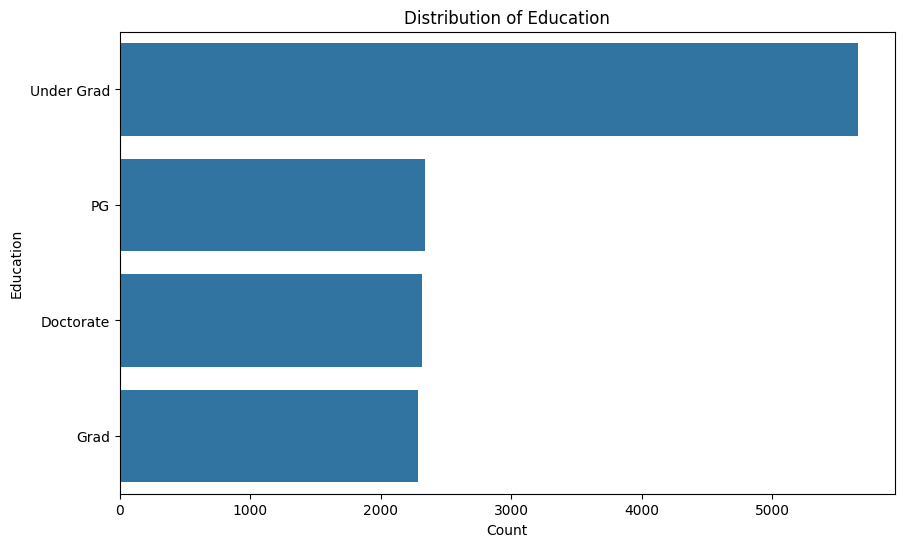

------------------------------
Value counts for 'Graduation_Specialization':
Graduation_Specialization
Chemistry      6091
Arts            900
Botony          864
Zoology         857
Sociology       857
Psychology      833
Economics       467
Mathematics     462
Statistics      444
Others          415
Engineering     409
Name: count, dtype: int64


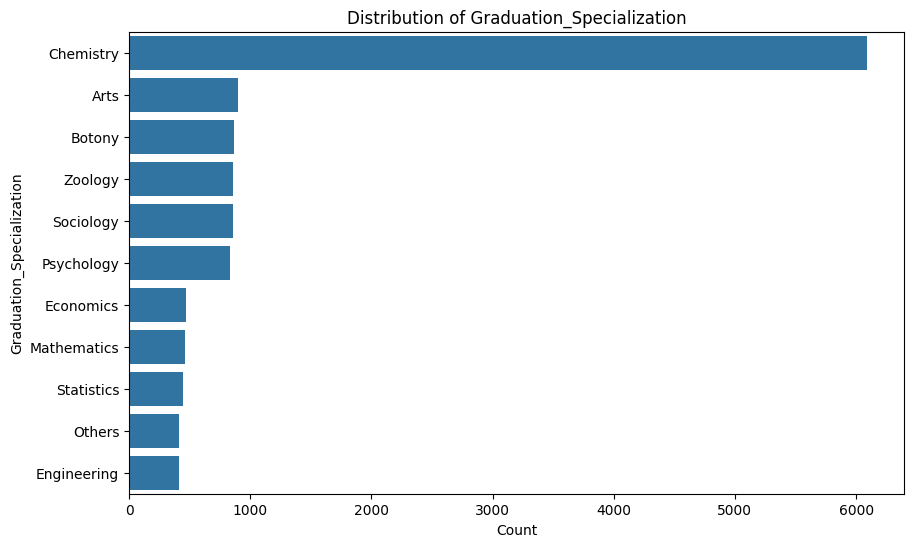

------------------------------
Value counts for 'University_Grad':
University_Grad
Bhubaneswar    6187
Mumbai          586
Delhi           577
Mangalore       553
Lucknow         537
Nagpur          531
Pune            530
Bangalore       528
Jaipur          519
Ahmedabad       518
Kolkata         517
Guwahati        516
Surat           500
Name: count, dtype: int64


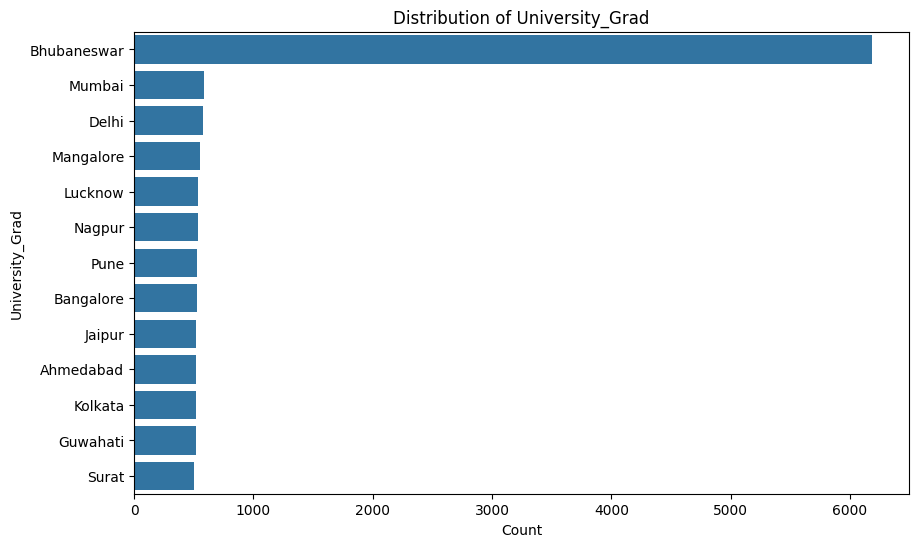

------------------------------
Value counts for 'PG_Specialization':
PG_Specialization
Mathematics    7503
Arts            621
Zoology         588
Botony          573
Sociology       568
Psychology      563
Economics       460
Statistics      438
Chemistry       438
Others          437
Engineering     410
Name: count, dtype: int64


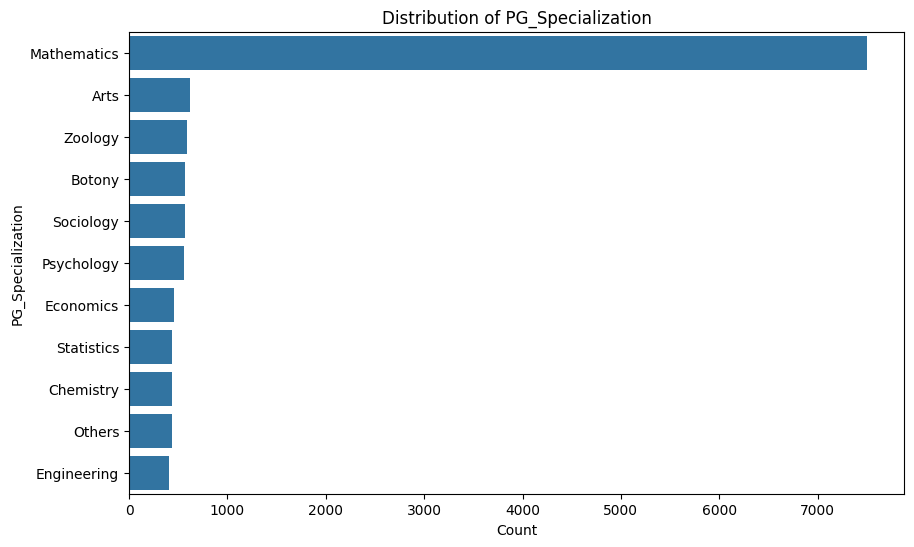

------------------------------
Value counts for 'University_PG':
University_PG
Bhubaneswar    7442
Mumbai          473
Delhi           463
Mangalore       442
Bangalore       430
Nagpur          429
Pune            426
Lucknow         421
Guwahati        418
Surat           417
Ahmedabad       415
Jaipur          415
Kolkata         408
Name: count, dtype: int64


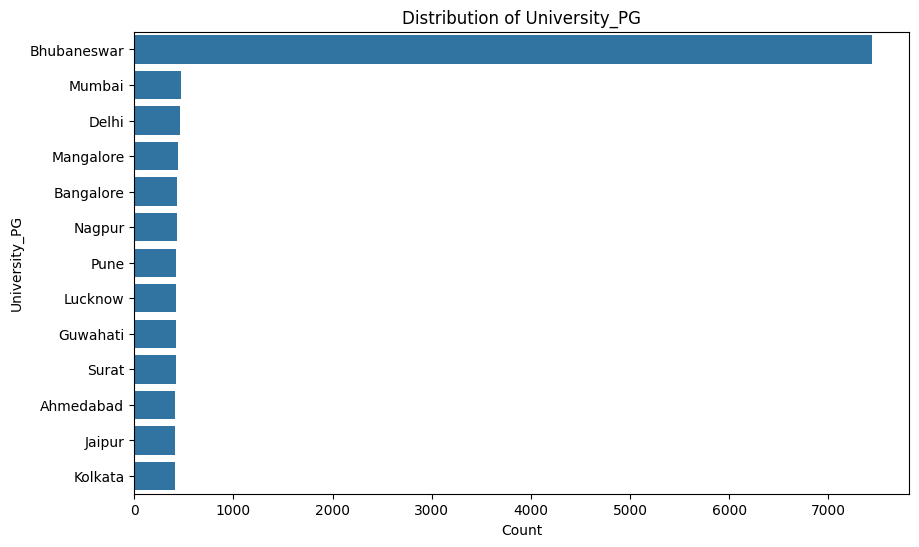

------------------------------
Value counts for 'PHD_Specialization':
PHD_Specialization
Others         11076
Chemistry        184
Mathematics      178
Statistics       173
Economics        171
Engineering      165
Arts             136
Zoology          131
Psychology       129
Sociology        129
Botony           127
Name: count, dtype: int64


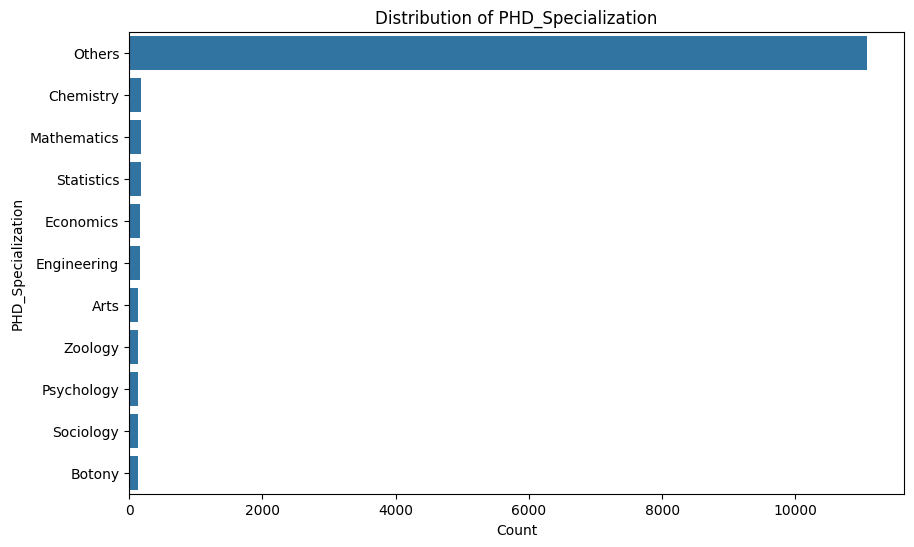

------------------------------
Value counts for 'University_PHD':
University_PHD
Kolkata        10984
Delhi            151
Bangalore        146
Mangalore        145
Mumbai           140
Guwahati         137
Jaipur           135
Surat            135
Bhubaneswar      134
Ahmedabad        133
Pune             131
Lucknow          121
Nagpur           107
Name: count, dtype: int64


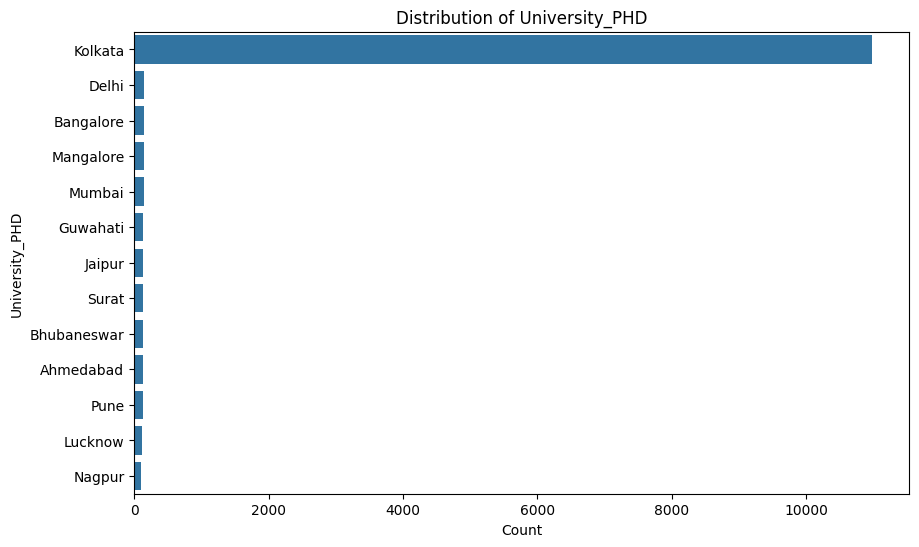

------------------------------
Value counts for 'Curent_Location':
Curent_Location
Jaipur         879
Kanpur         874
Bangalore      871
Bhubaneswar    867
Mangalore      863
Mumbai         859
Lucknow        856
Pune           844
Chennai        832
Kolkata        831
Delhi          831
Guwahati       826
Nagpur         824
Ahmedabad      790
Surat          752
Name: count, dtype: int64


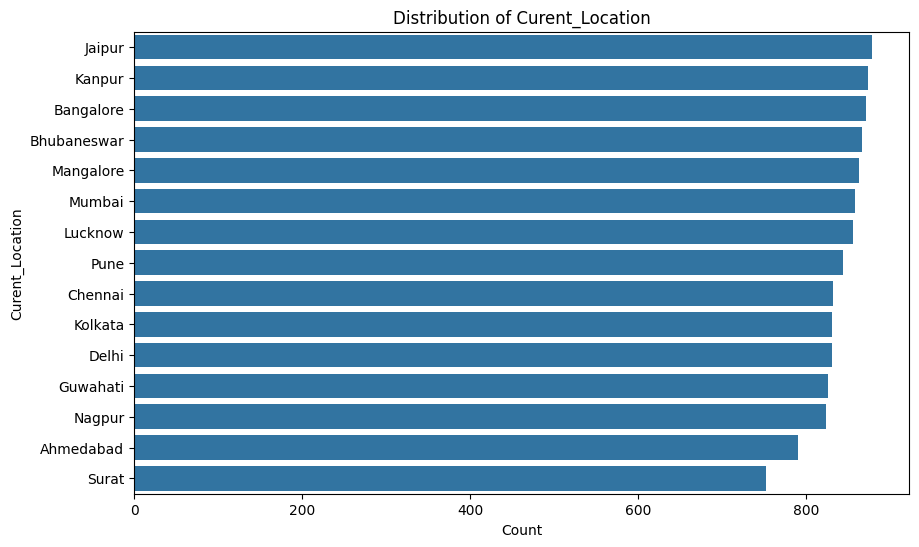

------------------------------
Value counts for 'Preferred_location':
Preferred_location
Kanpur         896
Pune           887
Mangalore      861
Surat          852
Guwahati       846
Ahmedabad      843
Kolkata        839
Delhi          838
Bhubaneswar    837
Bangalore      828
Nagpur         827
Jaipur         819
Mumbai         817
Lucknow        817
Chennai        792
Name: count, dtype: int64


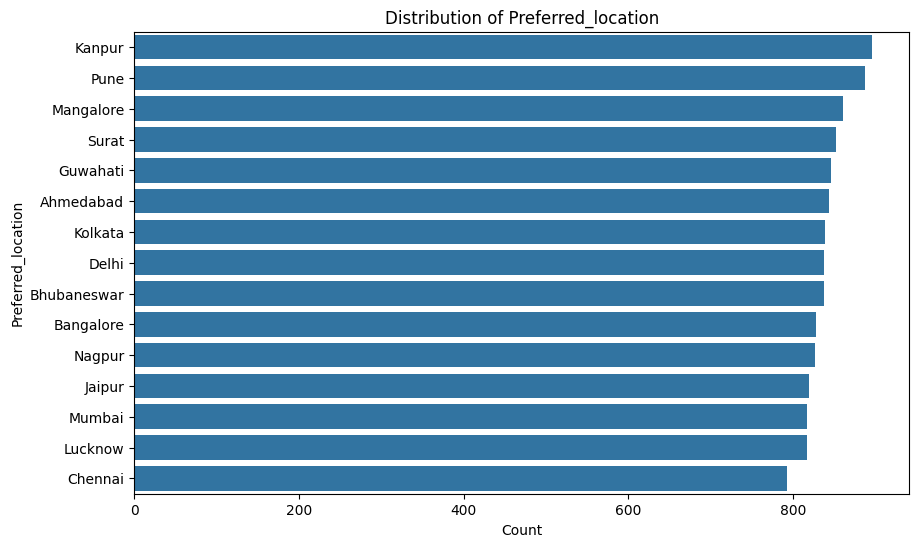

------------------------------
Value counts for 'Inhand_Offer':
Inhand_Offer
N    9758
Y    2841
Name: count, dtype: int64


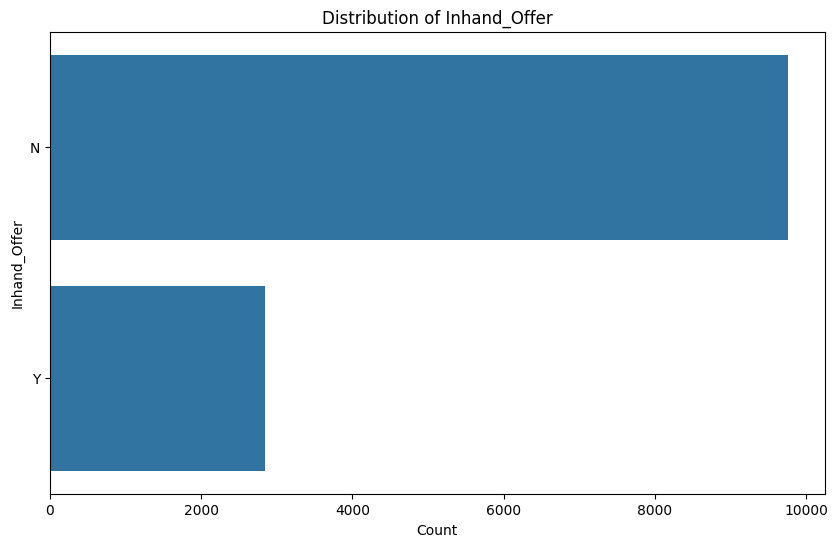

------------------------------
Value counts for 'Last_Appraisal_Rating':
Last_Appraisal_Rating
B                3218
D                2516
C                2400
A                2342
Key_Performer    2123
Name: count, dtype: int64


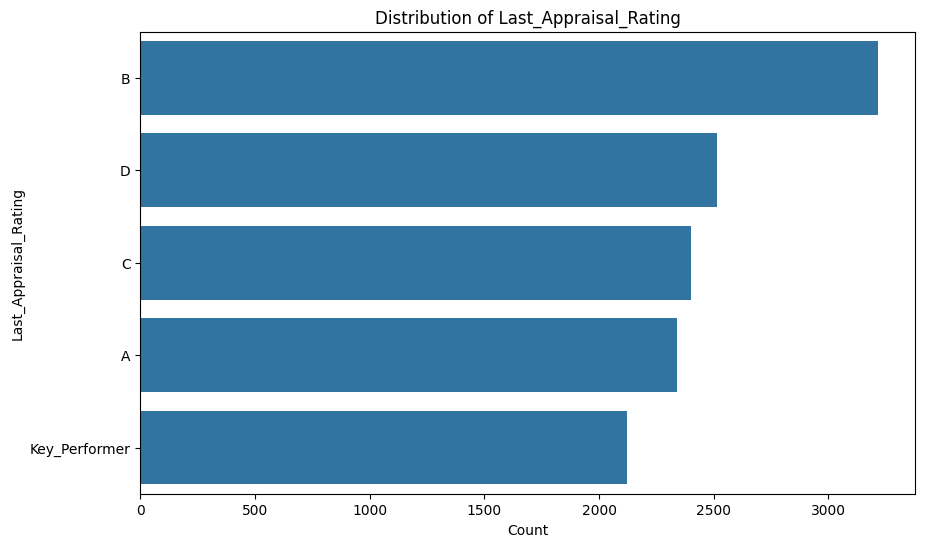

------------------------------


In [62]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Analyze categorical variables
for col in categorical_cols:
    print(f"Value counts for '{col}':")
    print(df[col].value_counts())
    plt.figure(figsize=(10, 6))
    sns.countplot(y=col, data=df, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.show()
    print("-" * 30)

Correlation Matrix of Numerical Columns:


,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,Certifications,International_degree_any,Expected_CTC
IDX,1.000000,0.003192,-0.007640,-0.007921,-0.001004,0.009647,0.009122,-0.008573,-0.012868,0.006371,0.005388,NaN,-0.007167
Applicant_ID,0.003192,1.000000,-0.009505,-0.009571,0.005842,0.003468,-0.011154,-0.015673,-0.015419,-0.012915,0.003543,NaN,-0.014871
Total_Experience,-0.007640,-0.009505,1.000000,0.621490,-0.580092,-0.010991,-0.047970,0.831510,0.387167,0.005345,-0.001842,NaN,0.805630
Total_Experience_in_field_applied,-0.007921,-0.009571,0.621490,1.000000,-0.359546,-0.001572,-0.026599,0.525636,0.240384,-0.012374,-0.001898,NaN,0.510664
Passing_Year_Of_Graduation,-0.001004,0.005842,-0.580092,-0.359546,1.000000,0.421579,-0.042108,-0.447263,-0.253939,-0.374684,-0.194257,NaN,-0.426358
Passing_Year_Of_PG,0.009647,0.003468,-0.010991,-0.001572,0.421579,1.000000,-0.105036,0.075050,-0.050125,-0.483047,-0.205655,NaN,0.090374
Passing_Year_Of_PHD,0.009122,-0.011154,-0.047970,-0.026599,-0.042108,-0.105036,1.000000,0.059861,0.037996,0.143651,-0.067503,NaN,0.064607
Current_CTC,-0.008573,-0.015673,0.831510,0.525636,-0.447263,0.075050,0.059861,1.000000,0.371350,-0.087820,-0.173041,NaN,0.989654
No_Of_Companies_worked,-0.012868,-0.015419,0.387167,0.240384,-0.253939,-0.050125,0.037996,0.371350,1.000000,0.046203,-0.010572,NaN,0.344394
Number_of_Publications,0.006371,-0.012915,0.005345,-0.012374,-0.374684,-0.483047,0.143651,-0.087820,0.046203,1.000000,0.215366,NaN,-0.096673


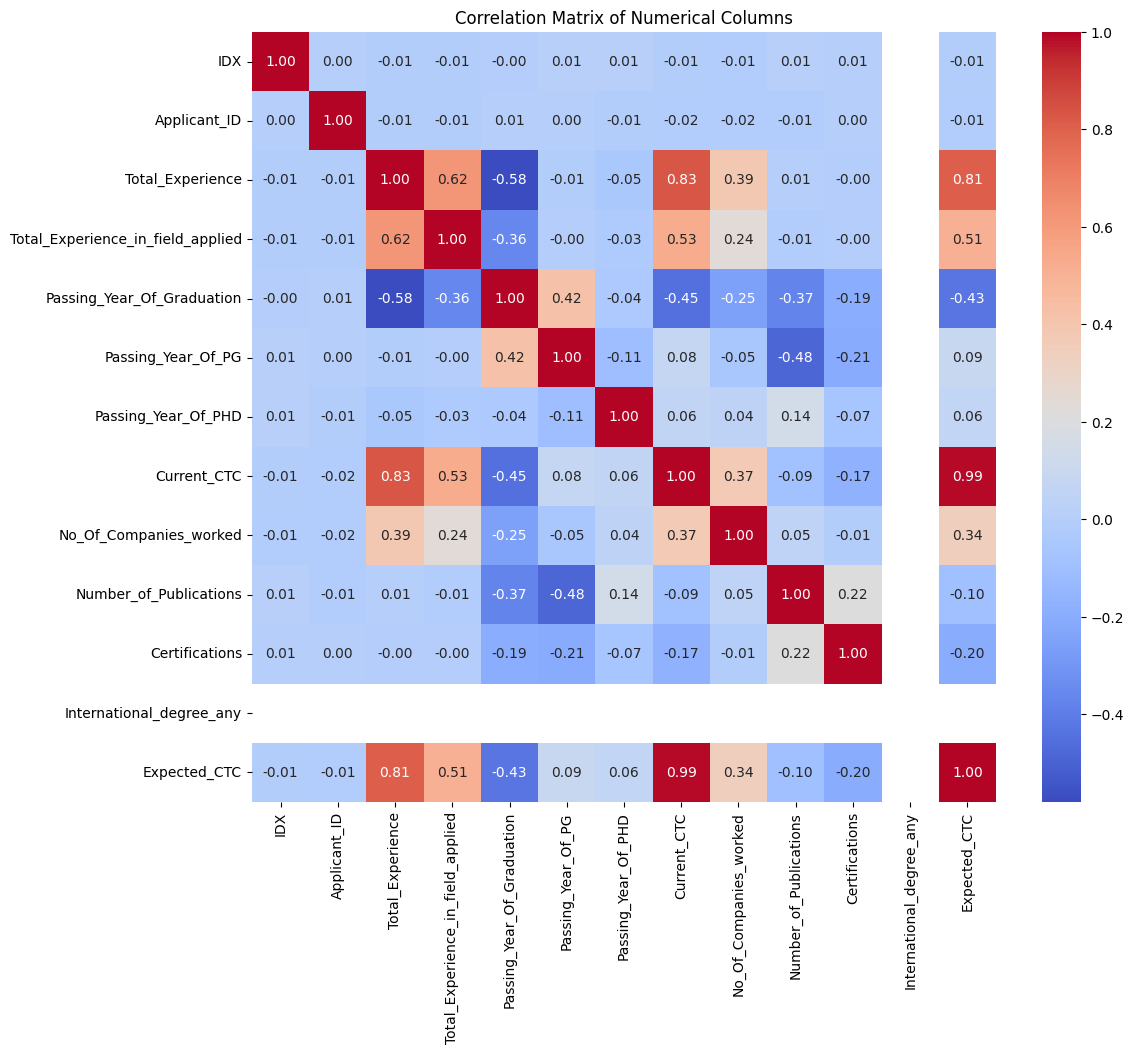

In [63]:
# Calculate the correlation matrix for numerical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
correlation_matrix = df[numerical_cols].corr()

# Display the correlation matrix
print("Correlation Matrix of Numerical Columns:")
display(correlation_matrix)

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Columns')
plt.show()

In [64]:
# Identify categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()

# Apply one-hot encoding to categorical columns
df = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

print("Categorical columns encoded using one-hot encoding.")
display(df.head())

Categorical columns encoded using one-hot encoding.


,IDX,Applicant_ID,Total_Experience,Total_Experience_in_field_applied,Passing_Year_Of_Graduation,Passing_Year_Of_PG,Passing_Year_Of_PHD,Current_CTC,No_Of_Companies_worked,Number_of_Publications,...,Preferred_location_Mangalore,Preferred_location_Mumbai,Preferred_location_Nagpur,Preferred_location_Pune,Preferred_location_Surat,Inhand_Offer_Y,Last_Appraisal_Rating_B,Last_Appraisal_Rating_C,Last_Appraisal_Rating_D,Last_Appraisal_Rating_Key_Performer
0,-1.728146,-0.842420,-1.756541,-1.114735,2.745220,-0.419524,-0.153106,-1.998429,-2.100014,-1.113851,...,False,False,False,True,False,False,True,False,False,False
7,-1.727177,0.114229,0.992519,0.917761,-0.542833,-0.419524,-0.153106,1.277382,1.478626,-0.736142,...,False,False,False,False,False,False,False,True,False,False
10,-1.726762,0.868263,0.124395,0.732989,-0.715888,-1.153480,-0.153106,0.717125,-0.310694,0.019277,...,False,False,True,False,False,True,False,False,False,True
12,-1.726485,-1.607711,-0.309667,0.732989,-0.369777,-0.419524,-0.153106,-0.239242,-0.310694,-0.358433,...,False,False,False,False,False,False,False,True,False,False
14,-1.726208,0.711092,-0.020292,0.548216,-0.369777,-0.786502,2.056502,0.422880,1.478626,0.019277,...,False,True,False,False,False,False,False,True,False,False


In [ ]:
# Save the processed DataFrame to a new CSV file
df.to_csv('expected_ctc_processed.csv', index=False)

print("Processed data saved to 'expected_ctc_processed.csv'")